In [1]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=1d8169bdb096e8ee91d9bacab956bfa29244a2d5812ad4700f448d96d590e962
  Stored in directory: /tmp/pip-ephem-wheel-cache-3lzv730e/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
!gdown --id "173H3vh-hZoq-R2zzgp8udcvt-jzE5jI5"
!gdown --id "1M659tYLqVsbk6BCQYQEpKix011C9VSR4"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=173H3vh-hZoq-R2zzgp8udcvt-jzE5jI5 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M659tYLqVsbk6BCQYQEpKix011C9VSR4
To: /content/Korpus_Ringkas.json
100% 62.5k/62.5k [00:00<00:00, 61.2MB/s]


In [4]:
referensi = ["https://yunusmuhammad007.medium.com/text-preprocessing-menggunakan-pandas-nltk-dan-sastrawi-untuk-large-dataset-5fb3c0a88571"]

# Bagian A

In [5]:
korpus = pd.read_json('/content/Korpus.json')

### 1. Jumlah data pada Korpus.json

In [6]:
korpus.shape[0]

1051

### 2. Analisa fitur section

#### a. Jumlah section unik

In [7]:
section_unik = korpus['section'].unique()
print('Jumlah section unik :', len(section_unik))
print('Section pada korpus :', section_unik)

Jumlah section unik : 6
Section pada korpus : ['ekonomi' 'nasional' 'internasional' 'teknologi' 'hiburan' 'olahraga']


#### Histogram data section

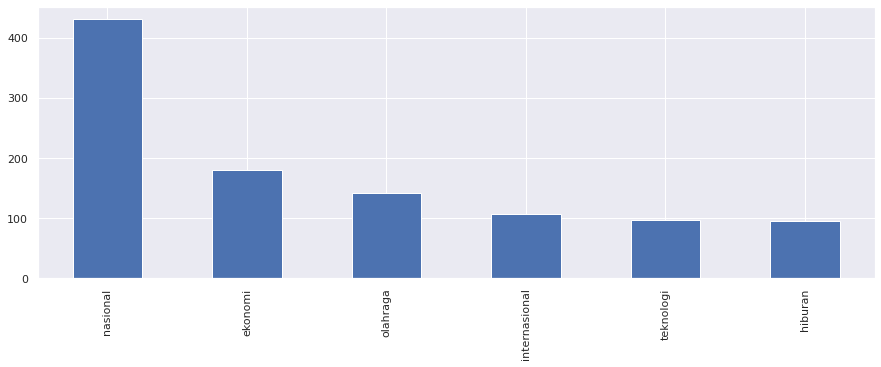

In [8]:
ax = korpus['section'].value_counts().plot(kind='bar', figsize=(15,5))

### 3. Analisa fitur content

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
list_words = []
for i in range(len(korpus['content'])):
  raw_words = korpus["content"][i].translate(str.maketrans("","", string.punctuation))
  words = nltk.word_tokenize(raw_words.lower())
  list_words.extend(words)

In [11]:
df = pd.DataFrame(columns=['word'])
df['word'] = list_words

In [12]:
unique_words = df['word'].value_counts()
tokenized_word = pd.DataFrame(unique_words)
tokenized_word = tokenized_word.reset_index()
tokenized_word.columns = ['kata', 'jumlah'] 
tokenized_word.head()

,kata,jumlah
0,yang,8236
1,di,7078
2,dan,6740
3,itu,3487
4,ini,3387


#### a. Jumlah kata unik dalam korpus

In [13]:
unique_words.shape[0]

23958

#### b.100 kata unik dengan jumlah terbanyak

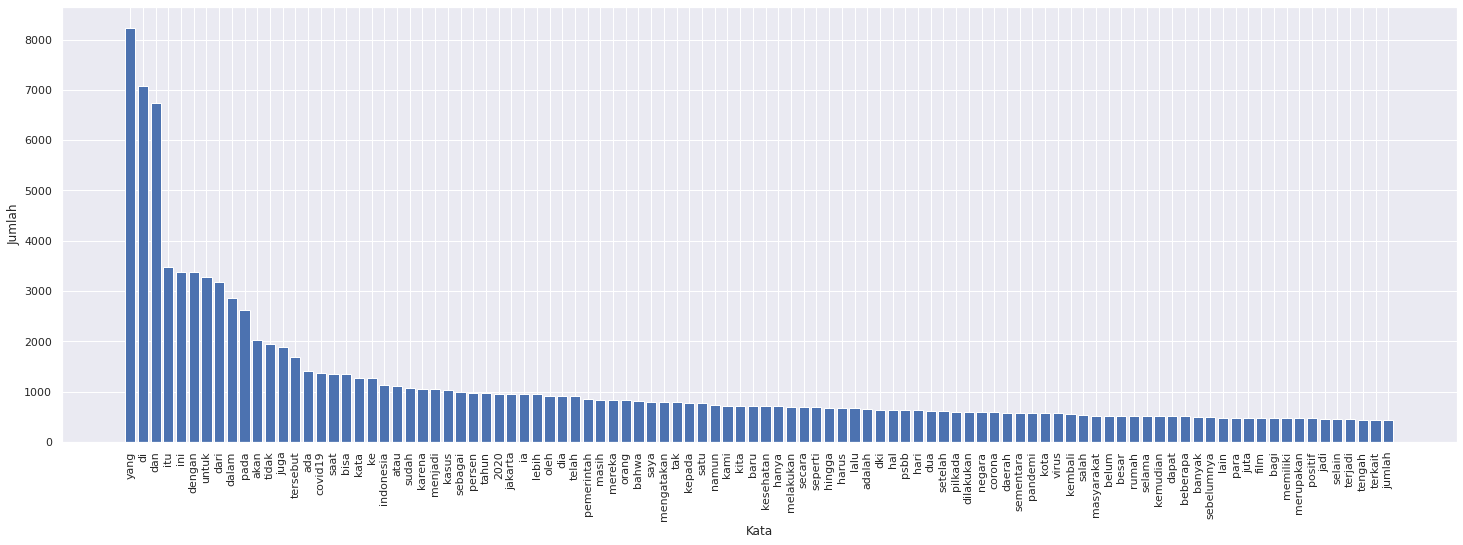

In [14]:
top_100 = tokenized_word.sort_values(by=['jumlah'], ascending=False).head(100)
plt.figure(figsize=(25,8))
plt.xlabel('Kata')
plt.xticks(rotation=90)
plt.ylabel('Jumlah')
plt.bar(x=top_100['kata'], height = top_100['jumlah'], width=0.8)
plt.show()

###### 10 kata terbanyak

In [15]:
top_100[['kata','jumlah']].head(10)

,kata,jumlah
0,yang,8236
1,di,7078
2,dan,6740
3,itu,3487
4,ini,3387
5,dengan,3371
6,untuk,3271
7,dari,3173
8,dalam,2862
9,pada,2616


#### 10 bigram terbanyak

In [16]:
list_bigrams = []
for i in range(len(korpus['content'])):
  raw_words = korpus["content"][i].translate(str.maketrans("","", string.punctuation))
  bigrams = nltk.bigrams(nltk.word_tokenize(raw_words.lower()))
  list_bigrams.extend(bigrams)

In [17]:
df1 = pd.DataFrame(columns=['bigram'])
df1['bigram'] = list_bigrams

In [18]:
bigram_word = df1['bigram'].value_counts()
tokenized_bigram = pd.DataFrame(bigram_word)
tokenized_bigram = tokenized_bigram.reset_index()
tokenized_bigram.columns = ['bigram', 'jumlah'] 

In [19]:
tokenized_bigram.sort_values(by=['jumlah'], ascending=False).head(10)

,bigram,jumlah
0,"(saat, ini)",556
1,"(dki, jakarta)",445
2,"(virus, corona)",423
3,"(salah, satu)",319
4,"(selain, itu)",257
5,"(rumah, sakit)",252
6,"(di, indonesia)",249
7,"(protokol, kesehatan)",245
8,"(berada, di)",232
9,"(gambasvideo, cnn)",211


### 4. Analisa fitur originalTitle

In [20]:
list_kata = []
for i in range(len(korpus['originalTitle'])):
  raw_words = korpus["originalTitle"][i].translate(str.maketrans("","", string.punctuation))
  kata = nltk.word_tokenize(raw_words.lower())
  list_kata.extend(kata)

In [21]:
df2 = pd.DataFrame(columns=['kata'])
df2['kata'] = list_kata

In [22]:
tokenized_judul = pd.DataFrame(df2['kata'].value_counts())
list_kata = tokenized_judul.index.tolist()

#### a. Rata-rata jumlah kata pada fitur

In [23]:
tokenized_judul['kata'].mean()

2.6716554673182653

#### b. Word cloud

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
wordcloud = WordCloud(background_color="white",max_words=30000).generate(" ".join(list_kata))

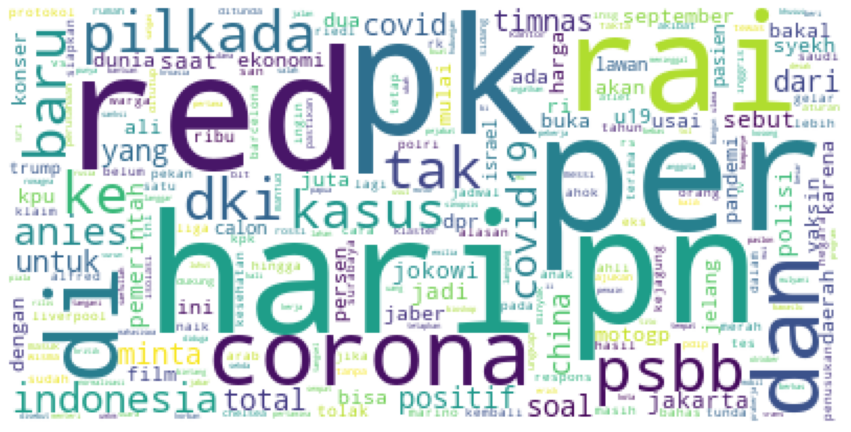

In [26]:
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Bagian B

In [27]:
import re

In [28]:
socmed = []
email = [] 
def find_account(text) :
  socmed_pattern = "[^A-z0-9\n]@[A-z0-9_.]{1,14}[A-z0-9_]"
  email_pattern = '[A-z0-9.\-_]+@[A-z0-9.\-_]+\.[A-z0-9\-._]+(?!\.)'
  socmed.extend(re.findall(socmed_pattern, text))
  email.extend(re.findall(email_pattern, text)) 

In [29]:
korpus['content'] = korpus['content'].apply(find_account)

### 1. Akun Email

In [30]:
email_df = pd.DataFrame(columns=['akun'])
email_df['akun'] = email
akun_email = email_df['akun'].value_counts()
for i in range (len(akun_email)) :
  print(akun_email.index[i], "-", akun_email[i])

info@railink.co.id. - 1
infopemilu.LHKPN@kpk.go.id - 1


### 2. Akun media sosial

In [31]:
socmed_df = pd.DataFrame(columns=['akun'])
socmed_df['akun'] = socmed
akun_socmed = socmed_df['akun'].value_counts()
for i in range (len(akun_socmed)) :
  print(akun_socmed.index[i], "-", akun_socmed[i])

 @commuterline - 3
 @chandra_ds - 3
 @basukibtp - 2
 @BennyHarmanID - 2
 @listongs - 2
 @NetflixUK - 2
 @ridwankamil - 2
 @TMCPoldaMetro - 2
 @acmawards - 2
 @Aditt_hr - 2
 @adiw9237 - 2
 @miztabay - 2
 @rr.irwin - 1
 @WallnerAndi - 1
 @jakarta.siana - 1
 @_KingPurwa - 1
 @sbotv - 1
 @syekh.alijaber - 1
 @boazsolossa - 1
 @abangriza - 1
 @m3takl_en - 1
 @infobekasi - 1
 @regureg - 1
 @Dwinamasayaa - 1
 @kaesangp - 1
 @HRimanti - 1
 @warung_jurnalis - 1
 @kemenkopukm - 1
 @rizqiawal - 1
 @putri_tanjung - 1
 @txtdaribogor - 1
 @tirta_hudhi - 1
 @prakerja.go.id - 1
 @kontributorjaka - 1
 @ito.kurnia - 1
 @firdzaradiany - 1
 @ganangsy - 1
 @tyonarie2 - 1
 @MushinAshin3 - 1
 @FerdinandHaean3 - 1
 @yasshh19 - 1
 @cositadelanoche - 1
 @Aikaz_F - 1
 @prastow - 1
 @KPK_RI - 1
 @pahlawandigital - 1
 @lambe_turah - 1
 @txtdaripooh - 1


### 3. Akun yang dipastikan merupakan akun instagram

In [32]:
list_akun_socmed = akun_socmed.index.values.tolist()
list_ig = []
for i in list_akun_socmed :
  ig_pattern = "@[A-z0-9_]+\.[A-z0-9_.]+"
  ig = re.findall(ig_pattern, i)
  print(i, "-", akun_socmed[i])

 @commuterline - 3
 @chandra_ds - 3
 @basukibtp - 2
 @BennyHarmanID - 2
 @listongs - 2
 @NetflixUK - 2
 @ridwankamil - 2
 @TMCPoldaMetro - 2
 @acmawards - 2
 @Aditt_hr - 2
 @adiw9237 - 2
 @miztabay - 2
 @rr.irwin - 1
 @WallnerAndi - 1
 @jakarta.siana - 1
 @_KingPurwa - 1
 @sbotv - 1
 @syekh.alijaber - 1
 @boazsolossa - 1
 @abangriza - 1
 @m3takl_en - 1
 @infobekasi - 1
 @regureg - 1
 @Dwinamasayaa - 1
 @kaesangp - 1
 @HRimanti - 1
 @warung_jurnalis - 1
 @kemenkopukm - 1
 @rizqiawal - 1
 @putri_tanjung - 1
 @txtdaribogor - 1
 @tirta_hudhi - 1
 @prakerja.go.id - 1
 @kontributorjaka - 1
 @ito.kurnia - 1
 @firdzaradiany - 1
 @ganangsy - 1
 @tyonarie2 - 1
 @MushinAshin3 - 1
 @FerdinandHaean3 - 1
 @yasshh19 - 1
 @cositadelanoche - 1
 @Aikaz_F - 1
 @prastow - 1
 @KPK_RI - 1
 @pahlawandigital - 1
 @lambe_turah - 1
 @txtdaripooh - 1


# Bagian C

In [37]:
korpus_ringkas = pd.read_json('/content/Korpus_Ringkas.json')

In [38]:
korpus_ringkas.head()

,id,content
0,0,MotoGP 2020akan memasuki seri ketujuh yang ber...
1,1,Pemerintah Provinsi DKI Jakarta menutup sement...
2,2,Ketua Komisi Pemilihan Umum (KPU)Arief Budiman...
3,3,Helikopter milik PT National Utility Helicopte...
4,4,Presiden Amerika Serikat Donald Trump dipastik...


#### a. Transformasi karakter menjadi lowercase

In [39]:
korpus_ringkas['content'] = korpus_ringkas['content'].str.lower()
korpus_ringkas.head()

,id,content
0,0,motogp 2020akan memasuki seri ketujuh yang ber...
1,1,pemerintah provinsi dki jakarta menutup sement...
2,2,ketua komisi pemilihan umum (kpu)arief budiman...
3,3,helikopter milik pt national utility helicopte...
4,4,presiden amerika serikat donald trump dipastik...


#### b. Hilangkan karakter angka, whitespace berlebih, dan tanda baca

##### Menghilangkan angka

In [40]:
def remove_number(text):
    return  re.sub(r"\d+", "", text)

In [41]:
korpus_ringkas['content'] = korpus_ringkas['content'].apply(remove_number)

##### Menghilangkan whitespace berlebih

In [42]:
# Fungsi untuk menghilangkan whitespace berlebih
def remove_whitespace(text):
    return re.sub('\s+',' ',text)

In [43]:
korpus_ringkas['content'] = korpus_ringkas['content'].apply(remove_whitespace)

##### Menghilangkan tanda baca

In [44]:
# Fungsi untuk menghilangkan tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","", string.punctuation))

In [45]:
korpus_ringkas['content'] = korpus_ringkas['content'].apply(remove_punctuation)

#### 3. Tokenisasi

In [46]:
# Fungsi untuk melakukan tokenisasi kata
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [47]:
pd.set_option("display.max_colwidth", -1)
korpus_ringkas['content_tokens'] = korpus_ringkas['content'].apply(word_tokenize_wrapper)
korpus_ringkas['content_tokens'].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    [motogp, akan, memasuki, seri, ketujuh, yang, bertajuk, motogp, emilia, romagna, di, sirkuit, misano, minggu, malam, waktu, indonesia, maverick, vinales, tampil, sebagai, pemimpin, start, disusul, jack, miller, dan, fabio, quartararo, yang, samasama, berada, di, baris, terdepan, pekan, lalu, di, sirkuit, yang, sama, vinales, juga, meraih, pole, position, tetapi, hanya, finis, di, peringkat, keenam, dan, harus, melihat, franco, morbidelli, tampil, sebagai, juara, berikut, prediksi, pemenang, motogp, emilia, romagna, versi, redaksi, olahraga, cnnindonesiacom, quartararo, menang, rossi, podium, haryanto, tri, wibowo, motogp, emilia, romagna, menjadi, momen, tepat, bagi, fabio, quartararo, untuk, kembali, ke, jalur, kemenangan, setelah, empat, terakhir, mengalami, nasib, sial, el, diablo, harus, ...]                                                                                         
1    [pemerintah, provinsi, dki, jakarta, menutup, sementara, perusahaan, atau, perkantoran, di, j

#### 4. Hapus stopwords

In [48]:
# mendownload stopwords berbahasa indonesia dari library nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
# Fungsi untuk menghilangkan stopword pada kalimat
def remove_stopword(words):
    return [word for word in words if word not in list_stopwords]

In [50]:
korpus_ringkas['content_tokens'] = korpus_ringkas['content_tokens'].apply(remove_stopword) 

# Bagian D

### 1. Stemming menggunakan sastrawi

In [51]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [52]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [53]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [54]:
def stemmer_sastrawi(words):
  stemmer_words = []
  for word in words :
    word = stemmer.stem(word)
    stemmer_words.append(word)
  return stemmer_words

In [55]:
korpus_ringkas['stemmer_tokens'] = korpus_ringkas['content_tokens'].apply(stemmer_sastrawi)

In [56]:
korpus_ringkas[['content_tokens','stemmer_tokens']].head(5)

,content_tokens,stemmer_tokens
0,"[motogp, memasuki, seri, ketujuh, bertajuk, motogp, emilia, romagna, sirkuit, misano, minggu, malam, indonesia, maverick, vinales, tampil, pemimpin, start, disusul, jack, miller, fabio, quartararo, samasama, baris, terdepan, pekan, sirkuit, vinales, meraih, pole, position, finis, peringkat, keenam, franco, morbidelli, tampil, juara, prediksi, pemenang, motogp, emilia, romagna, versi, redaksi, olahraga, cnnindonesiacom, quartararo, menang, rossi, podium, haryanto, tri, wibowo, motogp, emilia, romagna, momen, fabio, quartararo, jalur, kemenangan, mengalami, nasib, sial, el, diablo, membuktikan, layak, favorit, juara, dunia, motogp, meraih, kemenangan, motogp, emilia, romagna, quartararo, terbilang, konsisten, pekan, meraih, start, bagus, memiliki, kendala, sepeda, motor, m, quartararo, layak, dijagokan, meraih, kemenangan, pesaing, terketat, quartararo, pembalap, ...]","[motogp, pasuk, seri, tujuh, tajuk, motogp, emilia, romagna, sirkuit, misano, minggu, malam, indonesia, maverick, vinales, tampil, pimpin, start, susul, jack, miller, fabio, quartararo, samasama, baris, depan, pekan, sirkuit, vinales, raih, pole, position, finis, peringkat, enam, franco, morbidelli, tampil, juara, prediksi, menang, motogp, emilia, romagna, versi, redaksi, olahraga, cnnindonesiacom, quartararo, menang, rossi, podium, haryanto, tri, wibowo, motogp, emilia, romagna, momen, fabio, quartararo, jalur, menang, alami, nasib, sial, el, diablo, bukti, layak, favorit, juara, dunia, motogp, raih, menang, motogp, emilia, romagna, quartararo, bilang, konsisten, pekan, raih, start, bagus, milik, kendala, sepeda, motor, m, quartararo, layak, jago, raih, menang, saing, ketat, quartararo, balap, ...]"
1,"[pemerintah, provinsi, dki, jakarta, menutup, perusahaan, perkantoran, jakarta, terkait, virus, corona, covid, perusahaan, ditutup, lantaran, karyawan, terdeteksi, positif, sembilan, perusahaan, melanggar, peraturan, protokol, pencegahan, covid, kepala, dinas, tenaga, kerja, transmigrasi, energi, disnakertrans, dki, jakarta, andri, yansah, perusahaan, hasil, pemantauan, pemantauan, penerapan, pembatasan, sosial, berskala, psbb, senin, kamis, perusahaan, ditutup, ditutup, covid, sembilan, perusahaan, ditutup, menjalankan, protokol, kesehatan, pencegahan, covid, andri, keterangan, tertulisnya, jumat, perusahaan, ditutup, ditemukan, positif, tersebar, wilayah, jakarta, rinciannya, enam, perusahaan, jakarta, barat, masingmasing, perusahaan, jakarta, pusat, jakarta, timur, masingmasing, perusahaan, jakarta, utara, jakarta, selatan, sembilan, perusahaan, ditutup, melanggar, protokol, covid, perusahaan, jakarta, pusat, perusahaan, jakarta, barat, perusahaan, ...]","[perintah, provinsi, dki, jakarta, tutup, usaha, kantor, jakarta, kait, virus, corona, covid, usaha, tutup, lantar, karyawan, deteksi, positif, sembilan, usaha, langgar, atur, protokol, cegah, covid, kepala, dinas, tenaga, kerja, transmigrasi, energi, disnakertrans, dki, jakarta, andri, yansah, usaha, hasil, pantau, pantau, terap, batas, sosial, skala, psbb, senin, kamis, usaha, tutup, tutup, covid, sembilan, usaha, tutup, jalan, protokol, sehat, cegah, covid, andri, terang, tulis, jumat, usaha, tutup, temu, positif, sebar, wilayah, jakarta, rinciannya, enam, usaha, jakarta, barat, masingmasing, usaha, jakarta, pusat, jakarta, timur, masingmasing, usaha, jakarta, utara, jakarta, selatan, sembilan, usaha, tutup, langgar, protokol, covid, usaha, jakarta, pusat, usaha, jakarta, barat, usaha, ...]"
2,"[ketua, komisi, pemilihan, kpuarief, budimanmengaku, positif, terinfeksi, covid, menjalani, karantina, mandiri, merasakan, gejala, berat, keterangan, tertulisnya, arief, menjalani, tes, swab, kamis, malam, tes, syarat, menghadiri, rapat, istana, bogor, jumat, dinyatakan, positif, batal, mengikuti, rapat, tanggal, september, malam, tes, swab, syarat, menghadiri, rapat, istana, bogor, tanggal, september, hasil, positif, arief, wartawan, pesan, singkat, jumat, arief, menjalani, isolasi,

### 2. Lemmatization menggunakan stanza

In [57]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 5.3 MB/s 
     |████████████████████████████████| 4.4 MB 45.3 MB/s 
     |████████████████████████████████| 175 kB 72.6 MB/s 
     |████████████████████████████████| 101 kB 11.2 MB/s 
     |████████████████████████████████| 596 kB 53.1 MB/s 
     |████████████████████████████████| 6.6 MB 36.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d2830bfe377db2a8f3cb1aa21f574cdbc1da972060e5ec395a4134420d4b6fdf
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [58]:
import stanza
stanza.download('id', processors='tokenize')
nlp = stanza.Pipeline('id', processors='tokenize')

2022-06-27 10:01:47 WARNING: Language id package default expects mwt, which has been added
2022-06-27 10:01:47 INFO: Downloading these customized packages for language: id (Indonesian)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |



2022-06-27 10:01:48 INFO: Finished downloading models and saved to /root/stanza_resources.


2022-06-27 10:01:48 WARNING: Language id package default expects mwt, which has been added
2022-06-27 10:01:48 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |

2022-06-27 10:01:48 INFO: Use device: cpu
2022-06-27 10:01:48 INFO: Loading: tokenize
2022-06-27 10:01:48 INFO: Loading: mwt
2022-06-27 10:01:48 INFO: Done loading processors!


In [59]:
def lemma_stanza(words):
  lemmatization_words = []
  for word in words :
    word = nlp(word)
    lemmatization_words.append(word.text)
  return lemmatization_words

In [60]:
korpus_ringkas['lemmatization_tokens'] = korpus_ringkas['content_tokens'].apply(lemma_stanza)

In [61]:
korpus_ringkas[['content_tokens','lemmatization_tokens']].head(5)

,content_tokens,lemmatization_tokens
0,"[motogp, memasuki, seri, ketujuh, bertajuk, motogp, emilia, romagna, sirkuit, misano, minggu, malam, indonesia, maverick, vinales, tampil, pemimpin, start, disusul, jack, miller, fabio, quartararo, samasama, baris, terdepan, pekan, sirkuit, vinales, meraih, pole, position, finis, peringkat, keenam, franco, morbidelli, tampil, juara, prediksi, pemenang, motogp, emilia, romagna, versi, redaksi, olahraga, cnnindonesiacom, quartararo, menang, rossi, podium, haryanto, tri, wibowo, motogp, emilia, romagna, momen, fabio, quartararo, jalur, kemenangan, mengalami, nasib, sial, el, diablo, membuktikan, layak, favorit, juara, dunia, motogp, meraih, kemenangan, motogp, emilia, romagna, quartararo, terbilang, konsisten, pekan, meraih, start, bagus, memiliki, kendala, sepeda, motor, m, quartararo, layak, dijagokan, meraih, kemenangan, pesaing, terketat, quartararo, pembalap, ...]","[motogp, memasuki, seri, ketujuh, bertajuk, motogp, emilia, romagna, sirkuit, misano, minggu, malam, indonesia, maverick, vinales, tampil, pemimpin, start, disusul, jack, miller, fabio, quartararo, samasama, baris, terdepan, pekan, sirkuit, vinales, meraih, pole, position, finis, peringkat, keenam, franco, morbidelli, tampil, juara, prediksi, pemenang, motogp, emilia, romagna, versi, redaksi, olahraga, cnnindonesiacom, quartararo, menang, rossi, podium, haryanto, tri, wibowo, motogp, emilia, romagna, momen, fabio, quartararo, jalur, kemenangan, mengalami, nasib, sial, el, diablo, membuktikan, layak, favorit, juara, dunia, motogp, meraih, kemenangan, motogp, emilia, romagna, quartararo, terbilang, konsisten, pekan, meraih, start, bagus, memiliki, kendala, sepeda, motor, m, quartararo, layak, dijagokan, meraih, kemenangan, pesaing, terketat, quartararo, pembalap, ...]"
1,"[pemerintah, provinsi, dki, jakarta, menutup, perusahaan, perkantoran, jakarta, terkait, virus, corona, covid, perusahaan, ditutup, lantaran, karyawan, terdeteksi, positif, sembilan, perusahaan, melanggar, peraturan, protokol, pencegahan, covid, kepala, dinas, tenaga, kerja, transmigrasi, energi, disnakertrans, dki, jakarta, andri, yansah, perusahaan, hasil, pemantauan, pemantauan, penerapan, pembatasan, sosial, berskala, psbb, senin, kamis, perusahaan, ditutup, ditutup, covid, sembilan, perusahaan, ditutup, menjalankan, protokol, kesehatan, pencegahan, covid, andri, keterangan, tertulisnya, jumat, perusahaan, ditutup, ditemukan, positif, tersebar, wilayah, jakarta, rinciannya, enam, perusahaan, jakarta, barat, masingmasing, perusahaan, jakarta, pusat, jakarta, timur, masingmasing, perusahaan, jakarta, utara, jakarta, selatan, sembilan, perusahaan, ditutup, melanggar, protokol, covid, perusahaan, jakarta, pusat, perusahaan, jakarta, barat, perusahaan, ...]","[pemerintah, provinsi, dki, jakarta, menutup, perusahaan, perkantoran, jakarta, terkait, virus, corona, covid, perusahaan, ditutup, lantaran, karyawan, terdeteksi, positif, sembilan, perusahaan, melanggar, peraturan, protokol, pencegahan, covid, kepala, dinas, tenaga, kerja, transmigrasi, energi, disnakertrans, dki, jakarta, andri, yansah, perusahaan, hasil, pemantauan, pemantauan, penerapan, pembatasan, sosial, berskala, psbb, senin, kamis, perusahaan, ditutup, ditutup, covid, sembilan, perusahaan, ditutup, menjalankan, protokol, kesehatan, pencegahan, covid, andri, keterangan, tertulisnya, jumat, perusahaan, ditutup, ditemukan, positif, tersebar, wilayah, jakarta, rinciannya, enam, perusahaan, jakarta, barat, masingmasing, perusahaan, jakarta, pusat, jakarta, timur, masingmasing, perusahaan, jakarta, utara, jakarta, selatan, sembilan, perusahaan, ditutup, melanggar, protokol, covid, perusahaan, jakarta, pusat, perusahaan, jakarta, barat, perusahaan, ...]"
2,"[ketua, komisi, pemilihan, kpuarief, budimanmengaku, positif, terinfeksi, covid, menjalani, karantina, mandiri, merasakan, gejala, berat, keterangan, tertulisnya, arief, menjalani, tes, swab, kamis, malam, tes, syarat, menghadiri, rapat, istana, bo

#### 3. Pada nomor 1 perbedaan token yang setelah di stem dan sebelum adalah pada token yang sudah di stem merupakan kata dasar. Pola nya adalah menghapus imbuhan dari sebuah kata.  Tetapi hasil analisa ini belum sempurna, terdapat beberapa kata yang menuju kata dasar yang salah, contohnya adalah kata 'memasuki' yang di stem menjadi 'pasuk' padahal harusnya 'masuk'.

#### 4. Menurut saya hal ini akan berpengaruh secara signifikan terhadap sistem IR yang akan dibuat karena konteks kalimatnya jadi berbeda. Menurut saya sebelumnya harus dilakukan lemmatization terlebih dahulu agar sistem dapat mencari sinonim dari kata tersebut sebelum dilakukan stemming agar hasil lebih presisi. Selain itu sistem juga harus menerapkan dependency parsing agar mengetahui keterhubungan antar kata tersebut dengan kata lain. Berdasarkan hal tersebut sistem yang dibuat pasti akan kompleks

#### 5. Menurut saya lemmatization dan stemming perlu diterapkan dalam korpus yang didominasi slang words. Lemmatization digunakan karena terdapat beberapa slang words yang sudah dimasukkan ke dalam kamus. Sedangkan stemming digunakan untuk mencari kata dasar pada slang words, contohnya slang words yang sedang ramai digunakan orang-orang adalah penggunaan meng-[kata kerja] seperti mengsedih.

#### 6. Menurut saya menerapkan stemming dan lemmatization saja tidak cukup. Sistem IR tersebut menurut saya harus menerapkan POS Tagging untuk mengetahui kedudukan kata tersebut dalam kalimat. Selain itu menurut saya juga perlu diterapkan dependency parsing untuk melihat keterhubungan kata dengan kata lainnya sehingga makna sebenarnya dari kalimat dapat tercapai.